### Assignment on Classification
Dataset - Iris

In [82]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to python environment

In [83]:
# Loading dataset to python evnvironment

data = pd.read_excel("iris.xls")

In [84]:
# Displaying first five rows of data

data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
# Displaying numnber of rows and columns of data

data.shape

(150, 5)

### 2. Do the necessary pre-processing steps

In [86]:
# Checking if any null values are present in data

data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [87]:
# Checking the distribution of data

freqgraph = data.select_dtypes(include = ['float','int'])

In [88]:
freqgraph

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


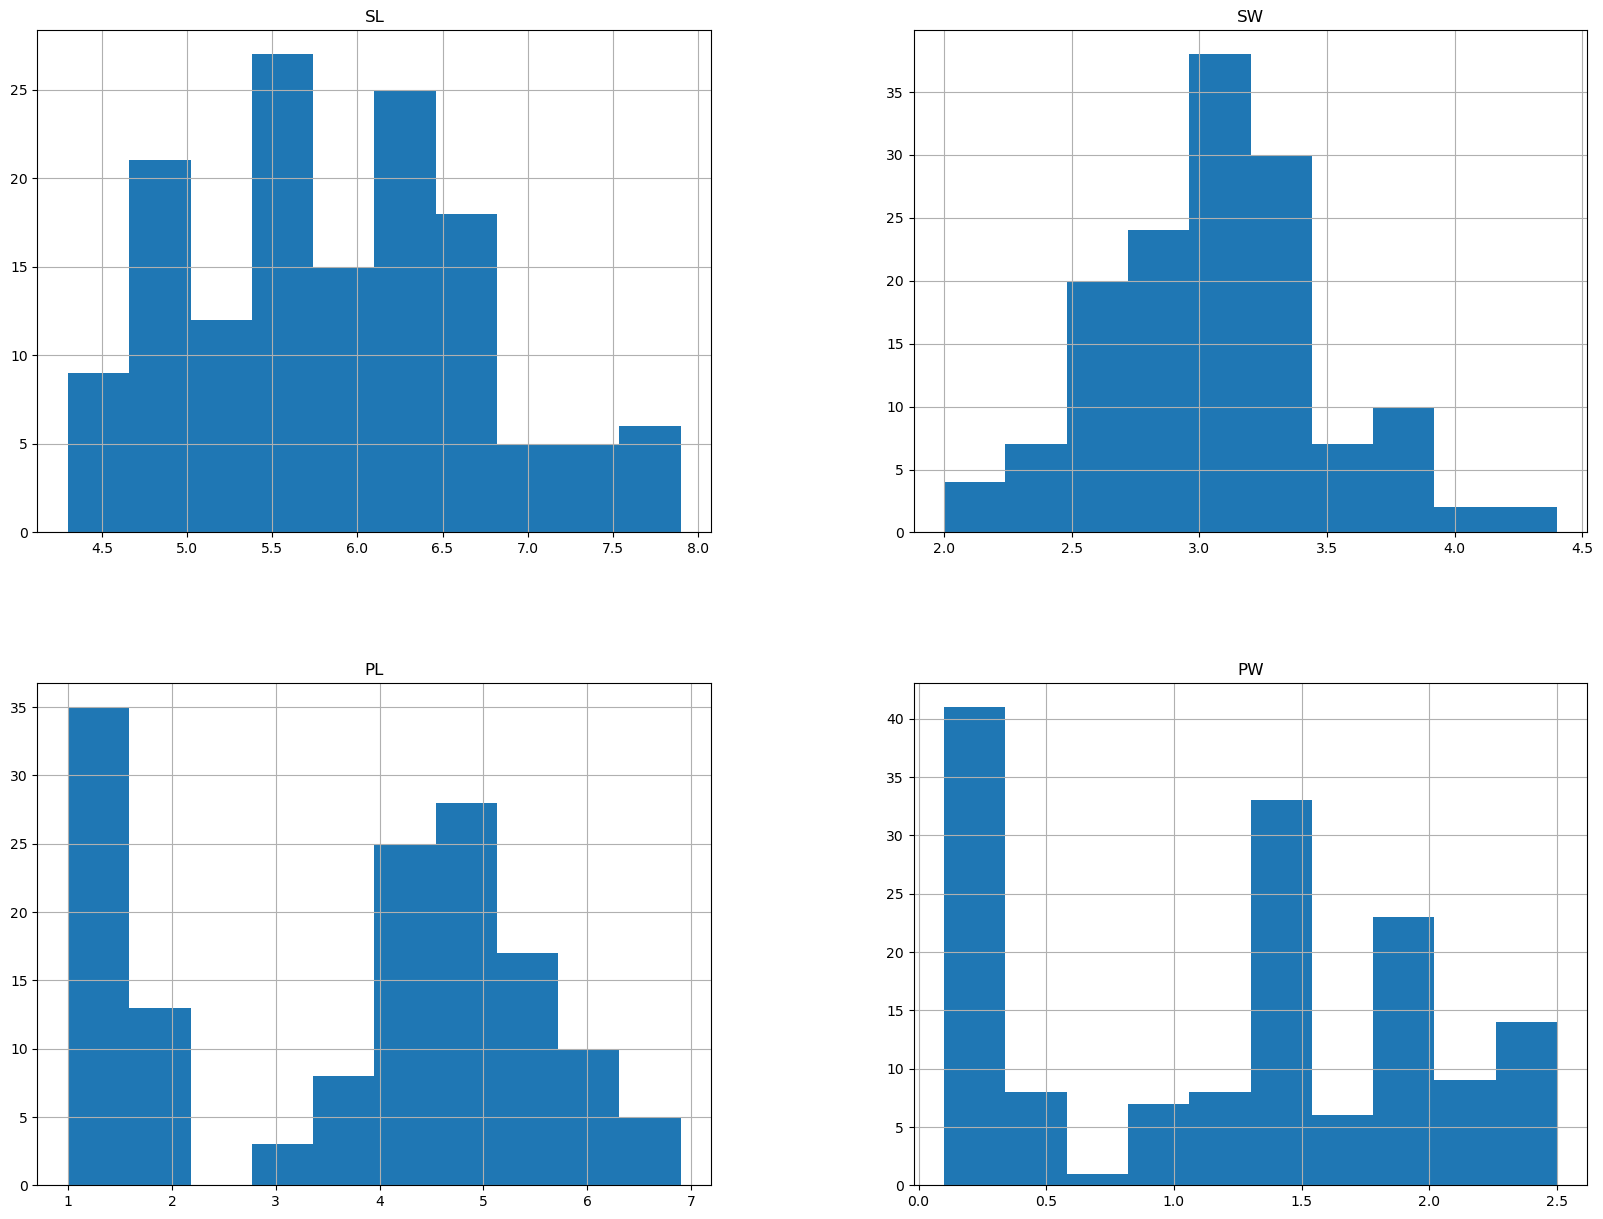

In [89]:
# Plotting the distribution of data 

freqgraph.hist(figsize=(20,15))
plt.show()

In [90]:
# Determining the type of data in each columns

data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [91]:
# Filling the missing values in SL,SW AND PL columns using median

for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [92]:
# Checking null values in data

data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### All null values have been removed

### Checking if any outliers are present in data

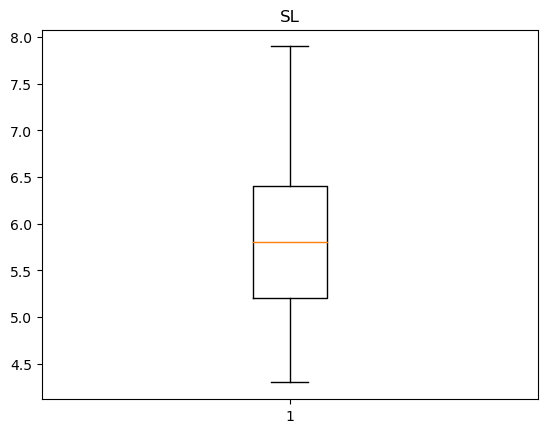

In [93]:
# plotting SL column using boxplot to check if any outliers are present

plt.boxplot(data['SL'])
plt.title('SL')
plt.show()

#### No outliers present in SL column

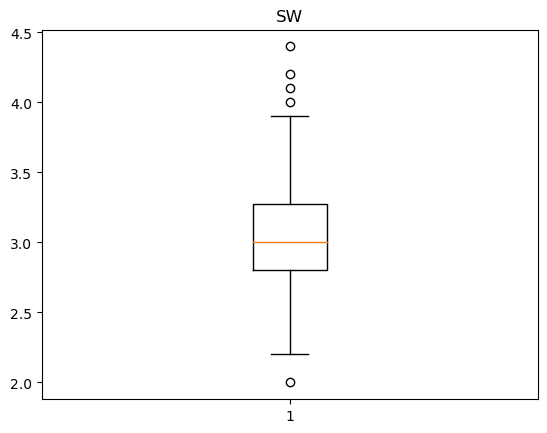

In [94]:
# plotting SW column using boxplot to check if any outliers are present

plt.boxplot(data['SW'])
plt.title('SW')
plt.show()

#### Outliers are present in SW column

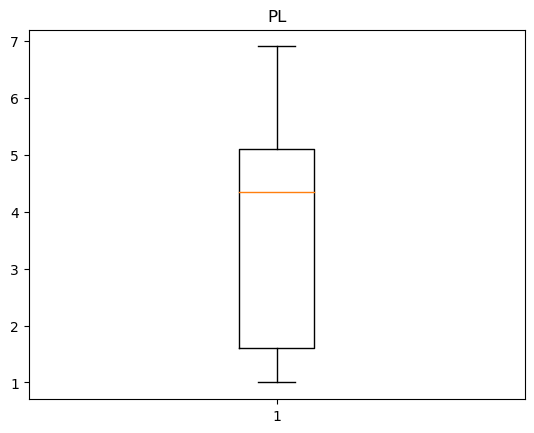

In [95]:
# plotting PL column using boxplot to check if any outliers are present
plt.boxplot(data['PL'])
plt.title('PL')
plt.show()

#### No outliers present in PL column

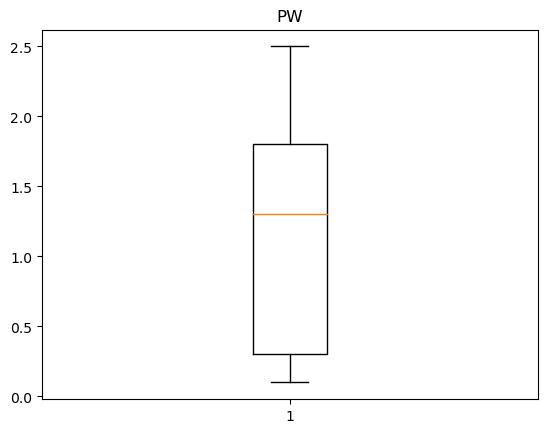

In [96]:
# plotting PW column using boxplot to check if any outliers are present

plt.boxplot(data['PW'])
plt.title('PW')
plt.show()

#### No outliers present in PW column

### Handling Outliers

In [16]:
# Handling outliers using IQR method
# Finding Q1,Q2 and Q3

Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [17]:
# Displaying Q1,Q2 and Q3

print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [18]:
# Finding the median value of SW column

data['SW'].median()

3.0

In [20]:
# Finding IQR

IQR = Q3 -Q1
print(IQR)

0.4500000000000002


In [21]:
# Finding lower limit and upper limit

low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


In [22]:
# Finding the outliers 

outlier = []
for x in data['SW']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [23]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [24]:
# Finding the index of outliers

index =data[(data["SW"] > up_limit)|(data["SW"] < low_limit)].index 

In [25]:
print(index)

Int64Index([14, 15, 32, 33, 60], dtype='int64')


In [26]:
# droping outlier values

data.drop(index,inplace=True)

In [27]:
# Displaying statistical information about data

data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [28]:
# Displaying number of rows and columns of data after removing outliers

data.shape

(145, 5)

In [32]:
# Splitting data into target and feature

y = data['Classification']
x = data.drop('Classification',axis = 1)

In [33]:
# Splitting data into training and testing set

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25,random_state = 42)

### 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)
### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression #Logistic Regression is present in linear_model
lr = LogisticRegression() #creating an instance of logistic regression model

In [35]:
# Creating the model
model = lr.fit(xtrain,ytrain) 

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
 #y predictions
ypred = model.predict(xtest) 

In [37]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [38]:
# checking the validation of the model
print(confusion_matrix(ytest,ypred))

[[13  1  0]
 [ 0  8  1]
 [ 0  2 12]]


In [39]:
# finding the accuracy of the model
print(accuracy_score(ytest,ypred)) 

0.8918918918918919


### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= [] #empty list for appending accuracy of model for each k values
neighbors = np.arange(3, 15) #k value from 3 to 14

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  model_knn = knn.fit(xtrain,ytrain)
  y_pred_knn = model_knn.predict(xtest)
  acc=accuracy_score(ytest,y_pred_knn)
  metric_k.append(acc) #appending accuracy of model for each k values

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [41]:
metric_k # accuracy array

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

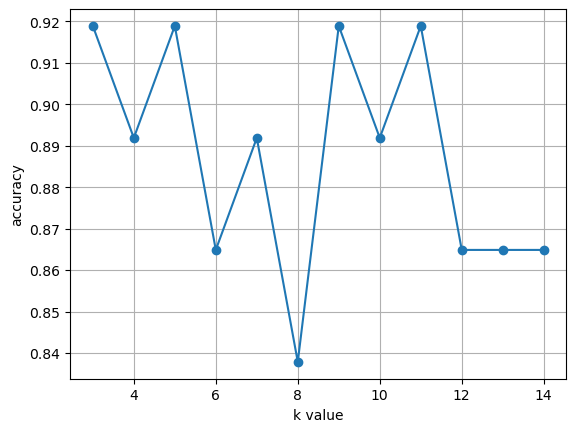

In [42]:
plt.plot(neighbors,metric_k,'o-') #plotting the accuracy for each k value
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [43]:
# Accuracy is more for points 5,9 and 11 can create model using k as 5,9 or 11
knn = KNeighborsClassifier(n_neighbors= 5)
model_knn =knn.fit(xtrain,ytrain)
y_pred_knn=model_knn.predict(xtest)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
print(confusion_matrix(ytest,y_pred_knn))

[[13  1  0]
 [ 0  8  1]
 [ 0  1 13]]


In [45]:
print(accuracy_score(ytest,y_pred_knn))

0.918918918918919


### SVM Model

In [50]:
from sklearn.svm import SVC   #support vector classifier

### SVM kernel= rbf

In [51]:
svm_clf = SVC(kernel = 'rbf' )   #creating instance

In [52]:
# Creating the model

model1 = svm_clf.fit(xtrain,ytrain)

In [53]:
ypred = model1.predict(xtest)

In [54]:
# checking efficiency of the model

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(ytest,ypred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [55]:
# Calculating  accuracy score of the model

accuracy_score(ytest,ypred)

0.8648648648648649

### SVM kernel = linear

In [56]:
svm_clf_linear = SVC(kernel='linear')

In [57]:
svm_model_linear=svm_clf.fit(xtrain,ytrain)

In [58]:
y_pred_svm_linear =svm_model_linear.predict(xtest)

In [59]:
confusion_matrix(ytest,y_pred_svm_linear)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [60]:
accuracy_score(ytest,y_pred_svm_linear)

0.8648648648648649

### SVM kernel = polynomial

In [61]:
svm_clf_linear=SVC(kernel='poly')

In [62]:
svm_model_poly=svm_clf.fit(xtrain,ytrain)

In [63]:
y_pred_svm_poly=svm_model_poly.predict(xtest)

In [64]:
confusion_matrix(ytest,y_pred_svm_poly)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [65]:
accuracy_score(ytest,y_pred_svm_poly)

0.8648648648648649

###  Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_clf = DecisionTreeClassifier(random_state =42) #creating an instance

In [68]:
dt_clf.fit(xtrain,ytrain) # fitting the model

DecisionTreeClassifier(random_state=42)

In [72]:
ypred_tree = dt_clf.predict(xtest)

In [73]:
#evaluating model
confusion_matrix(ytest,ypred_tree)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [75]:
accuracy_score(ytest, ypred_tree)

0.918918918918919

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_clf = RandomForestClassifier(random_state=42)

In [78]:
rf_clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [79]:
ypred_random = rf_clf.predict(xtest)

In [80]:
confusion_matrix(ytest,ypred_random)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [81]:
accuracy_score(ytest,ypred_random)

0.9459459459459459

### Conclusion

#### Accuracy comparison between different models :
####    1. Logistic regression: 0.8918918918918919
####    2. KNN: 0.918918918918919
####    3. SVM 
####     kernel-rbf: 0.8648648648648649
####      kernel-linear: 0.8648648648648649
####      kernel-polynomial : 0.8648648648648649
####    4. Decision Trees: 0.918918918918919
####    5. Random Forest: 0.9459459459459459   
        
#### From this we can conclude that Random forest model has highest accuracy(0.945) compared to other models amd SVM models 
#### has least accuracy(0.864).